### IT508 (Pattern Recognition and Machine Learning)
### Assignment 5 Solution
### Student Name - Alokendu Mazumder
### Student ID - 201916003

In [166]:
#Libraries imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline

In [167]:
iris = datasets.load_iris()

In [168]:
X = iris.data[:, :2]
y = iris.target

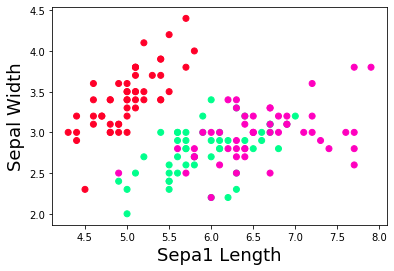

In [169]:
#Graph representing actual iris dataset
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepa1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.show()

## k-means clustering algorithm is computed using in-built function

In [170]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [171]:
centers = km.cluster_centers_
print(centers)

[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


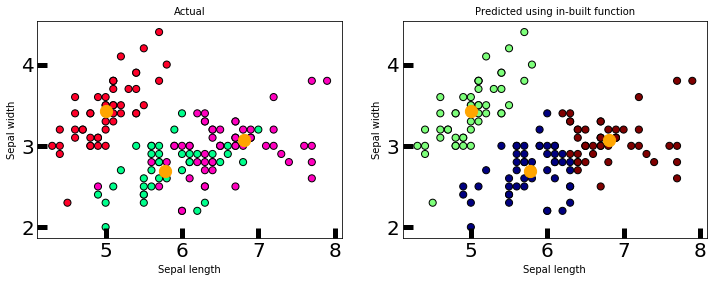

In [172]:
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow', edgecolor='k', s=50)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet', edgecolor='k', s=50)
axes[0].set_xlabel('Sepal length', fontsize=10)
axes[0].set_ylabel('Sepal width', fontsize=10)
axes[1].set_xlabel('Sepal length', fontsize=10)
axes[1].set_ylabel('Sepal width', fontsize=10)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=10)
axes[1].set_title('Predicted using in-built function', fontsize=10)
axes[0].scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=150, c='orange')
axes[1].scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=150, c='orange')

plt.show()

## k-means clustering algorithm is computed manually. 

In [173]:
data = pd.read_csv("iris.csv")

X=data[["sepal.length","sepal.width","petal.length","petal.width"]]
y=data["variety"]

# Number of training data
m = X.shape[0]
# Number of features in the data
n = X.shape[1]
n_iter=100#number of iteration
K=3 #k mean value

In [174]:
D = np.array(X)
#Initialize the centroids randomly from the data points
Centroids=np.array([]).reshape(n,0)
#Centroids is a n x K dimentional matrix, where each column will be a centroid for one cluster.
for i in range(K):
    rand=random.randint(0,m-1)
    Centroids=np.c_[Centroids,D[rand]]
Centroids

array([[5.8, 6.7, 4.8],
       [2.6, 3. , 3.1],
       [4. , 5. , 1.6],
       [1.2, 1.7, 0.2]])

In [175]:
Output={}
for i in range(n_iter):
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
            tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
            EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    C=np.argmin(EuclidianDistance,axis=1)+1
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(4,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],D[i]]
     
    for k in range(K):
        Y[k+1]=Y[k+1].T
    
    for k in range(K):
         Centroids[:,k]=np.mean(Y[k+1],axis=0)
    Output=Y

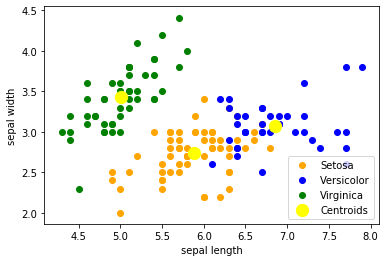

In [176]:
color=['orange','blue','green']
labels=['Setosa','Versicolor','Virginica']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=150,c='yellow',label='Centroids')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()